In [1]:
import os
import glob

import cv2
from matplotlib import pyplot as plt
import numpy as np

l = glob.glob('/Volumes/GoogleDrive/Shared drives/ikalog3/962.01077.0.mp4')
l = glob.glob('/Volumes/GoogleDrive/Shared drives/ikalog3/raw.mp4')

from PIL import Image
import numpy as np


resized = (480, 270)


#img = np.array(Image.open('v2_rainmaker_we_got.png'))
#print(img.shape, len(img.shape))
#rainmaker = cv2.cvtColor(np.array(Image.open('v2_rainmaker_we_got.png')), cv2.COLOR_BGR2GRAY)
#print(rainmaker.shape)
#plt.imshow(rainmaker, cmap="gray")
#plt.show()

In [2]:
image_list = []
name_list = []
for i in glob.glob('masks/*/*.png'):
    print(i)
    img = np.array(Image.open(i))
    print(img.shape, len(img.shape))
    try:
        if len(img.shape) >= 3:
            image_gray = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),  dsize=resized)
        else:
            image_gray = cv2.resize(img,  dsize=resized)
    except:
        print("pass")
        pass
    print(image_gray.shape)
    #if image_gray.shape == (720, 1280):
    image_list.append(image_gray)
    name_list.append(i)
    #else:
    #    print("pass")

image_list_np = np.array(image_list)
print(image_list_np.shape)
sequences = np.zeros(image_list_np.shape[0])

masks/ja/v2_game_go_sign.png
(720, 1280) 2
(270, 480)
masks/ja/v2_ui_tower.png
(720, 1280) 2
(270, 480)
masks/ja/v2_game_timer_icon.png
(720, 1280) 2
(270, 480)
masks/ja/v2_towercontrol_they_lost.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_splatzone_they_got.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_rainmaker_they_got.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_splatzone_we_got.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_ranked_they_lead.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_rainmaker_we_got.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_ranked_we_lead.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_rainmaker_we_lost.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_towercontrol_we_took.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_towercontrol_they_took.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_towercontrol_we_lost.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_cramblitz_we_back.png
(720, 1280, 4) 3
(270, 480)
masks/ja/v2_lobby_matched.png
(720, 1280) 2
(270, 480)
masks/ja/v2_cramblitz_they_b

In [3]:
sequences = np.zeros(image_list_np.shape[0])
print(sequences.shape)

(27,)


count 23 masks/ja/rainmaker_rule_negate.png


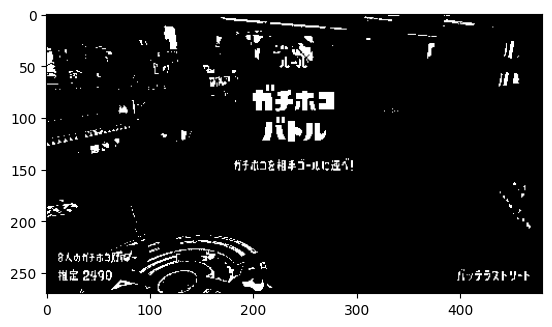

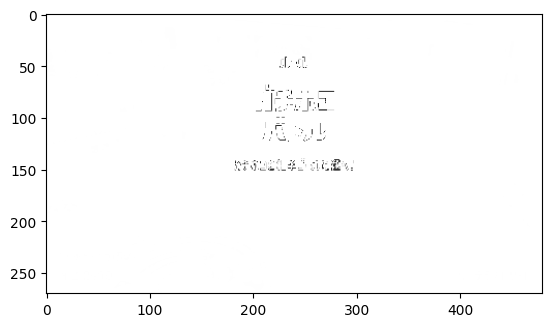

count 23 masks/ja/rainmaker_rule_negate.png


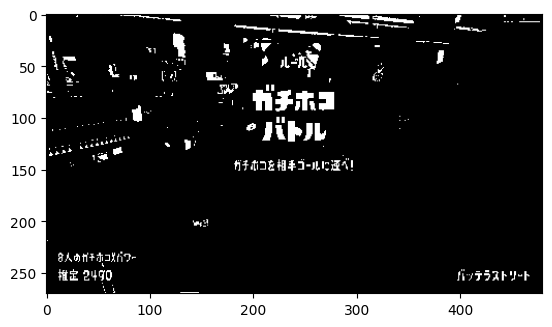

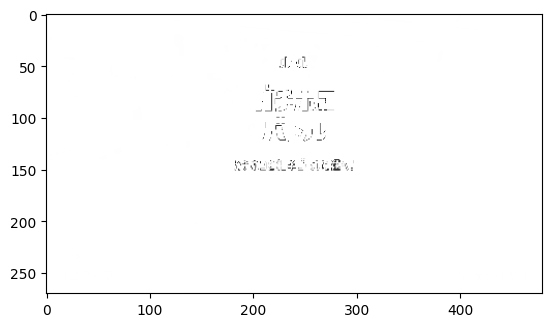

count 23 masks/ja/rainmaker_rule_negate.png


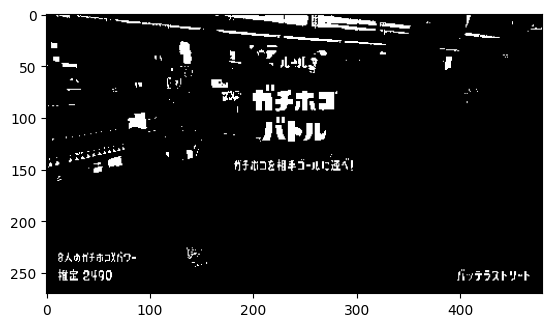

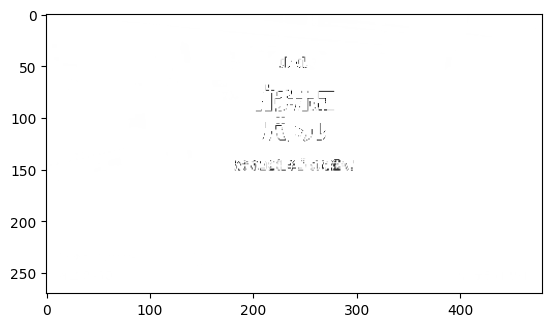

count 23 masks/ja/rainmaker_rule_negate.png


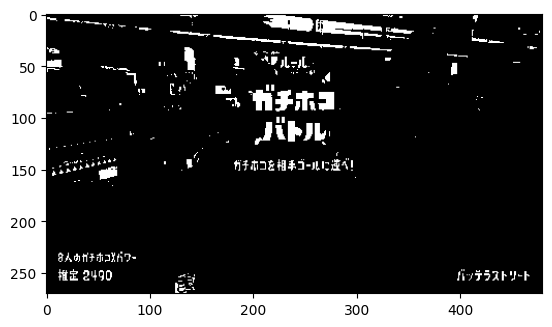

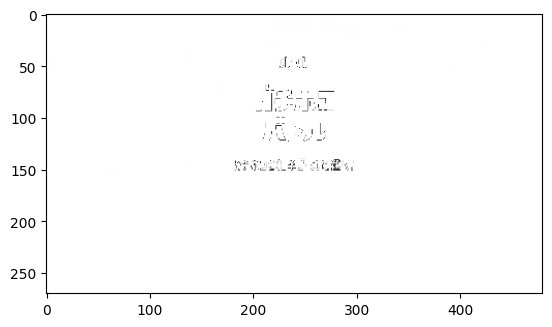

count 23 masks/ja/rainmaker_rule_negate.png


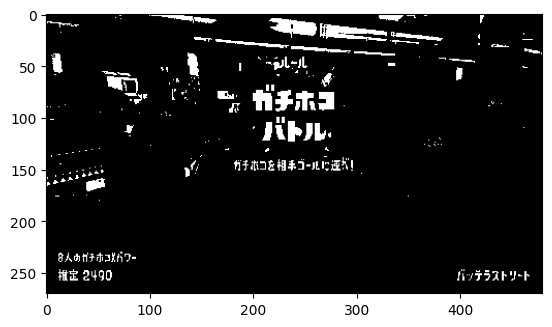

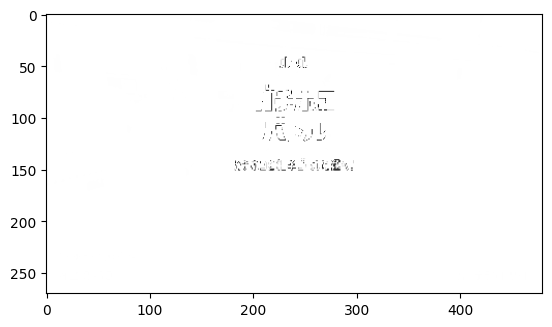

count 5 masks/ja/v2_rainmaker_they_got.png


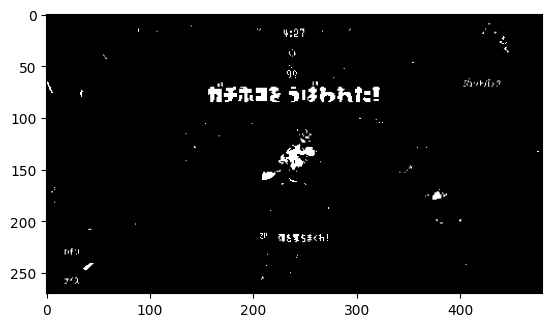

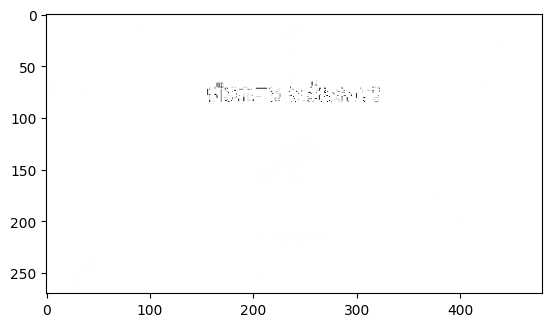

count 20 masks/ja/v2_rainmaker_they_lost.png


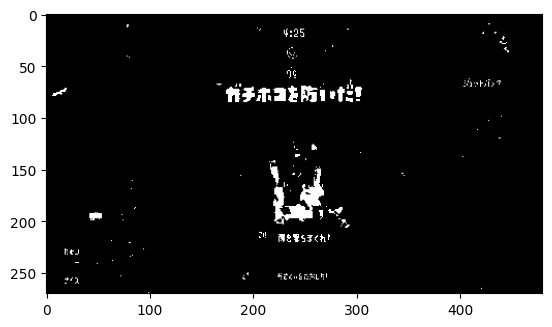

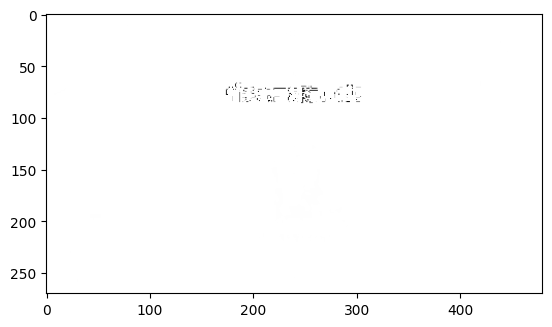

count 20 masks/ja/v2_rainmaker_they_lost.png


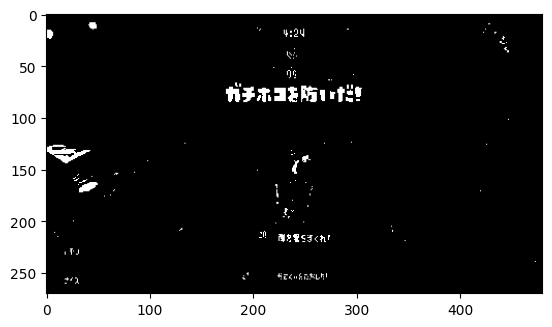

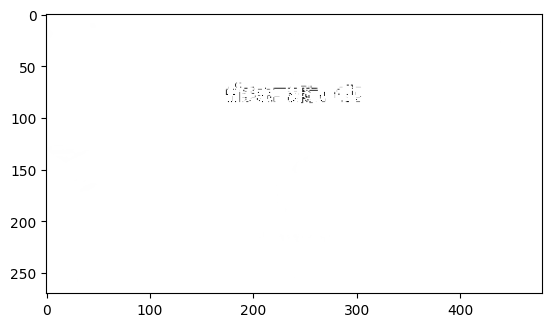

count 9 masks/ja/v2_ranked_we_lead.png


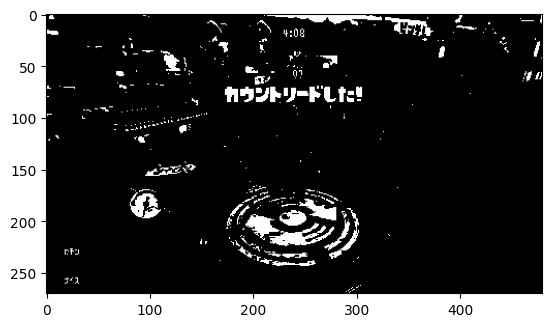

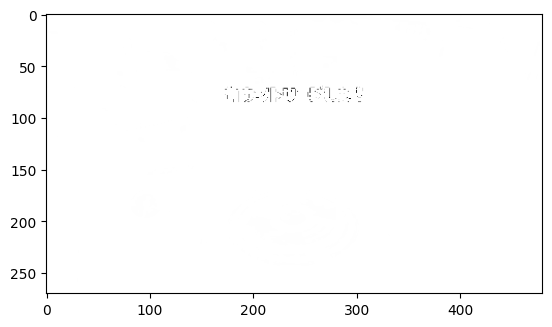

count 9 masks/ja/v2_ranked_we_lead.png


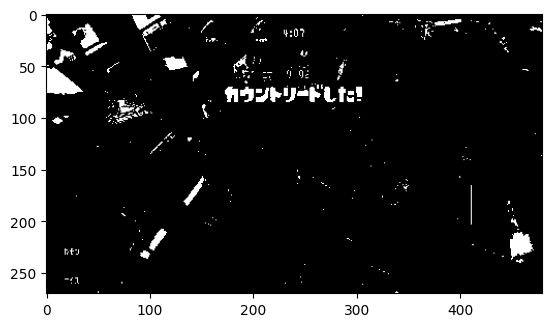

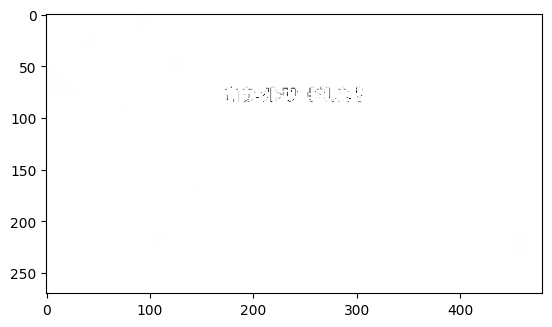

count 10 masks/ja/v2_rainmaker_we_lost.png


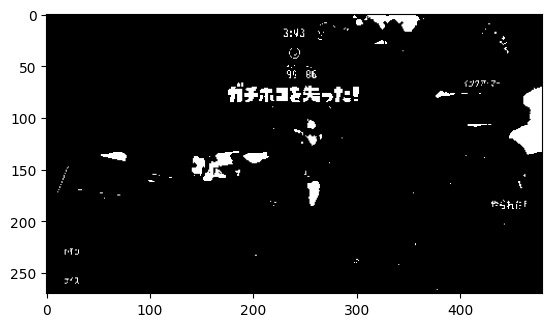

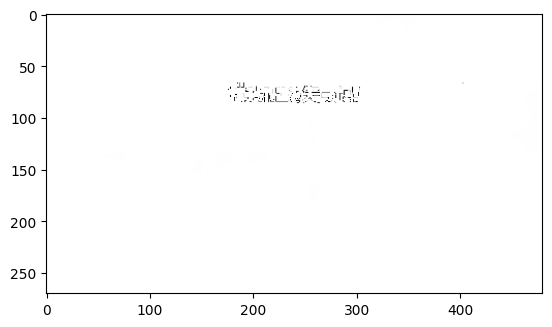

count 10 masks/ja/v2_rainmaker_we_lost.png


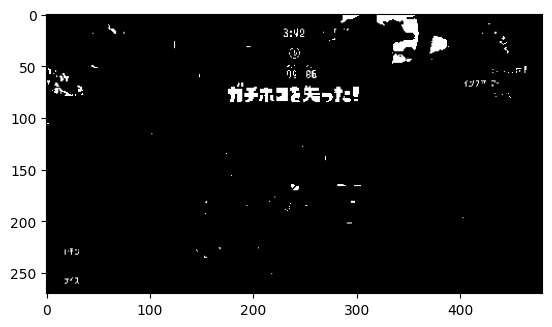

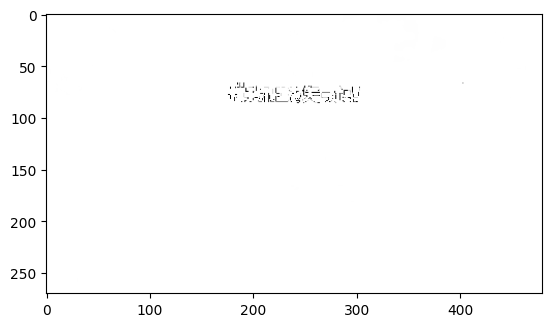

count 5 masks/ja/v2_rainmaker_they_got.png


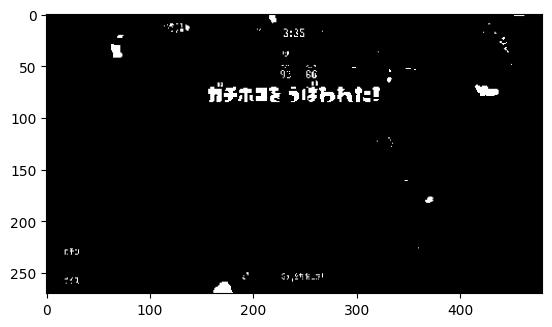

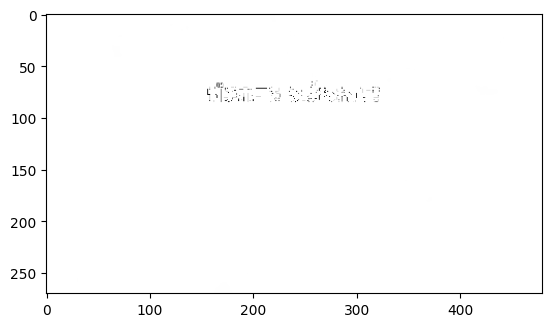

count 7 masks/ja/v2_ranked_they_lead.png


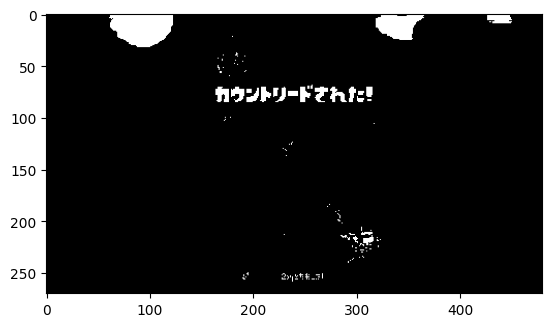

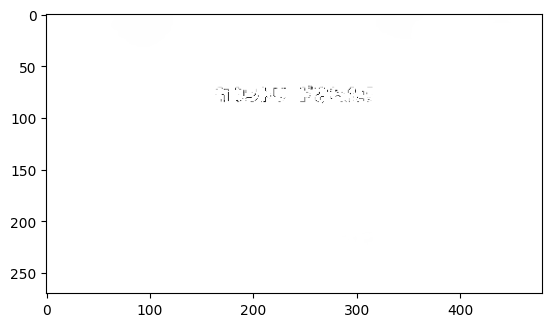

count 20 masks/ja/v2_rainmaker_they_lost.png


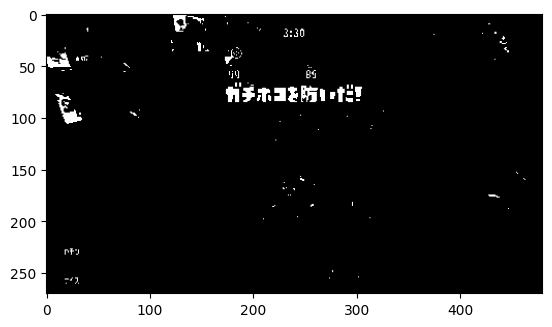

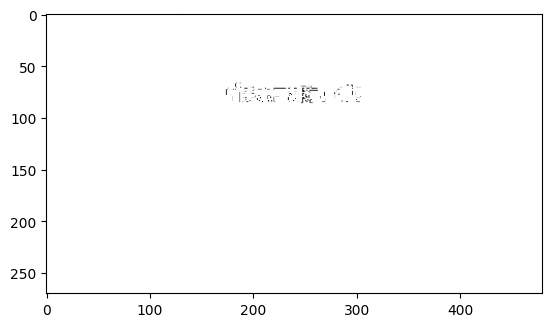

count 20 masks/ja/v2_rainmaker_they_lost.png


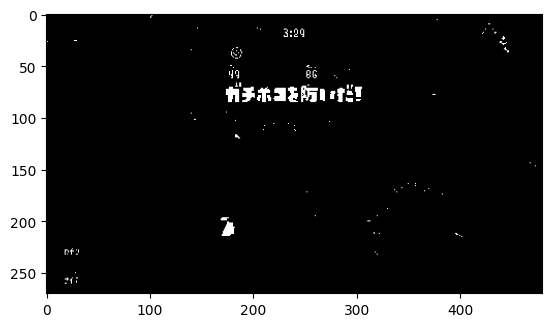

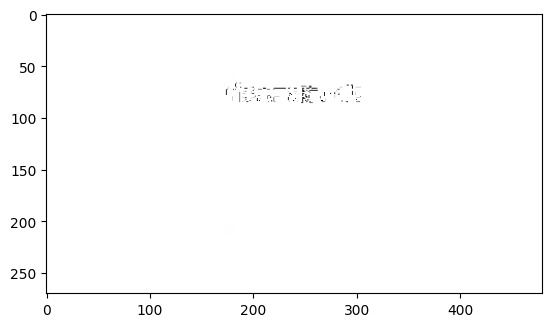

count 8 masks/ja/v2_rainmaker_we_got.png


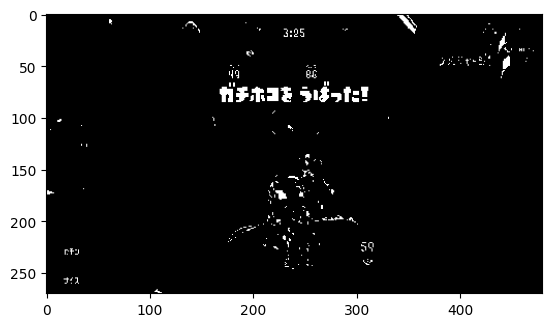

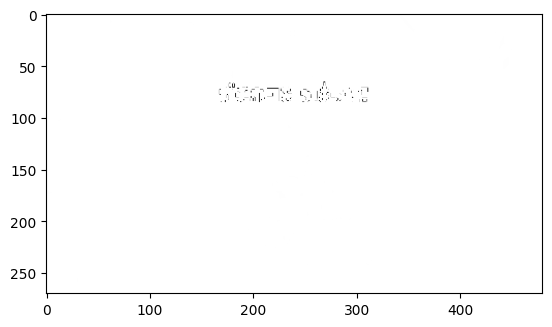

count 10 masks/ja/v2_rainmaker_we_lost.png


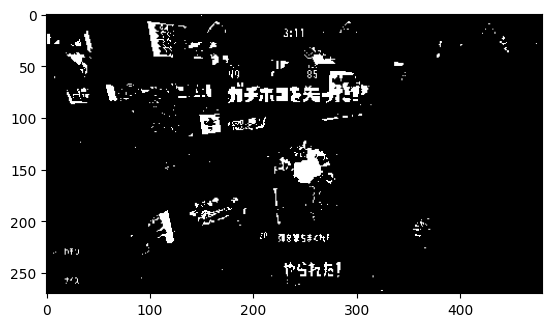

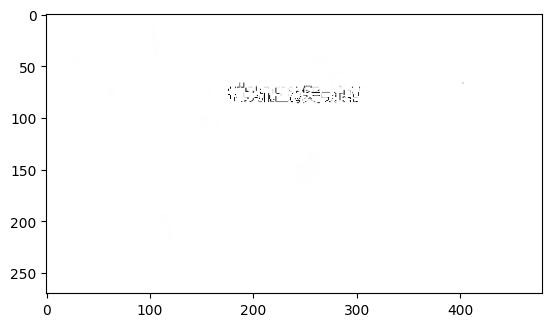

count 5 masks/ja/v2_rainmaker_they_got.png


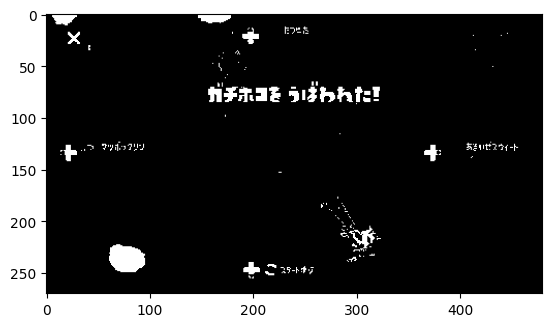

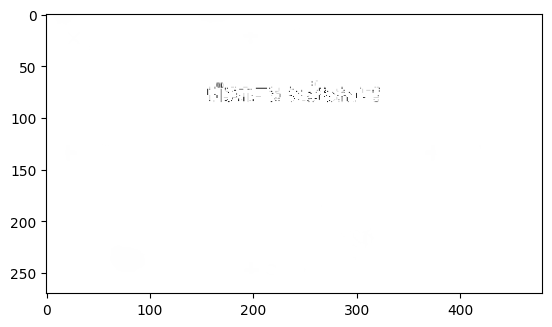

count 5 masks/ja/v2_rainmaker_they_got.png


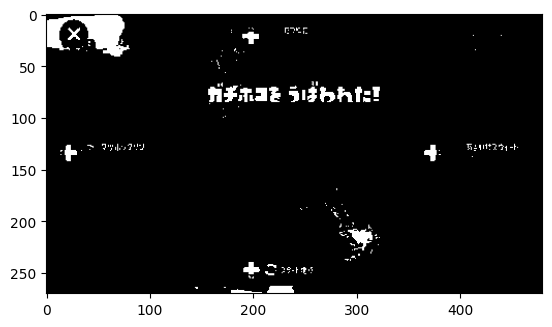

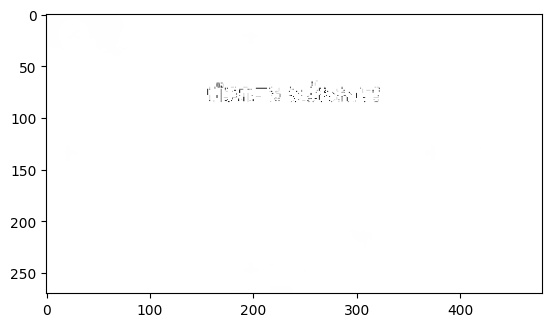

count 20 masks/ja/v2_rainmaker_they_lost.png


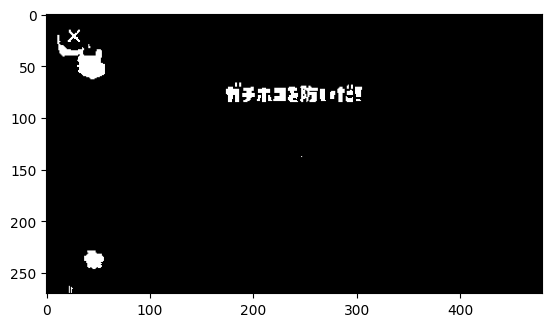

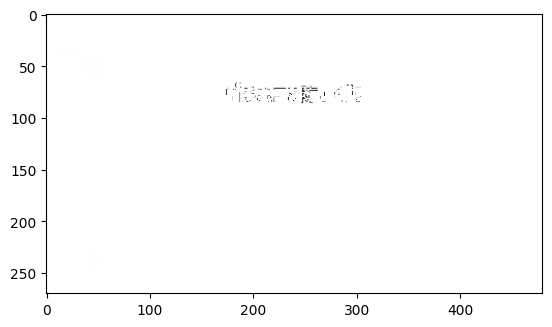

count 5 masks/ja/v2_rainmaker_they_got.png


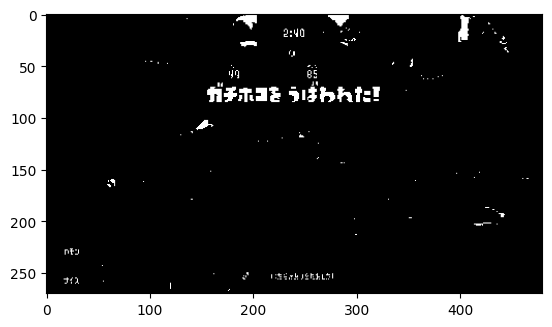

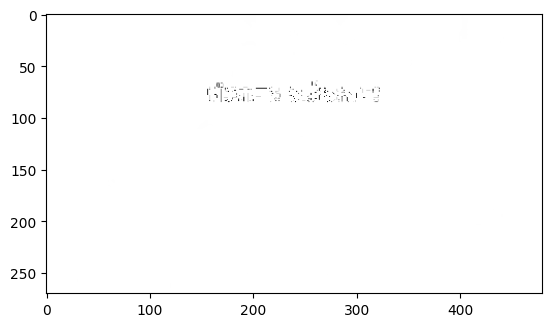

count 20 masks/ja/v2_rainmaker_they_lost.png


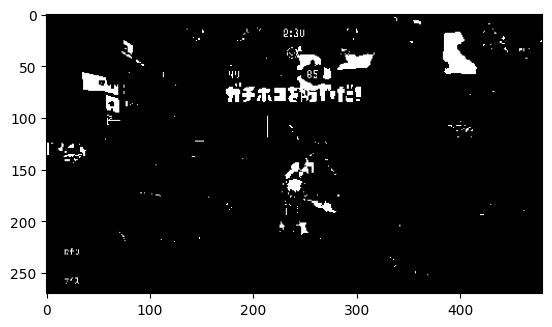

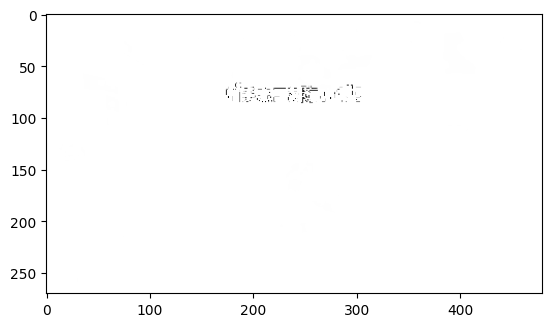

count 20 masks/ja/v2_rainmaker_they_lost.png


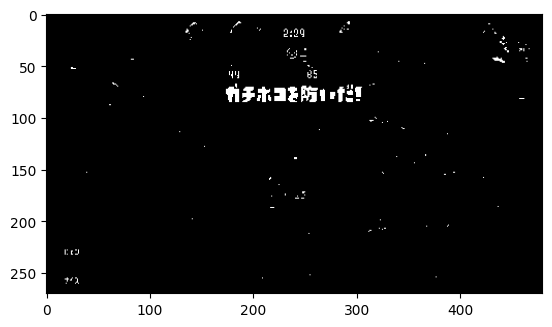

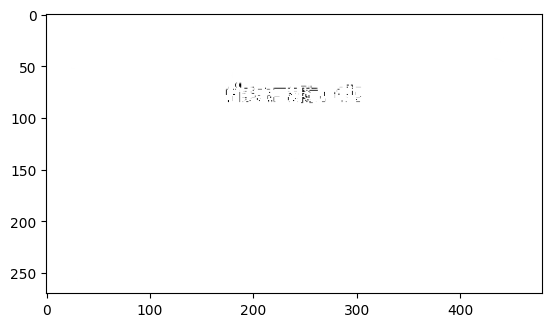

count 8 masks/ja/v2_rainmaker_we_got.png


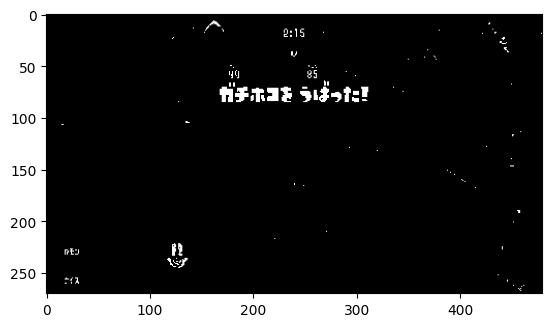

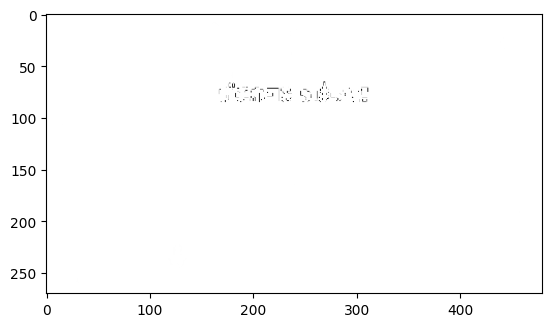

KeyboardInterrupt: 

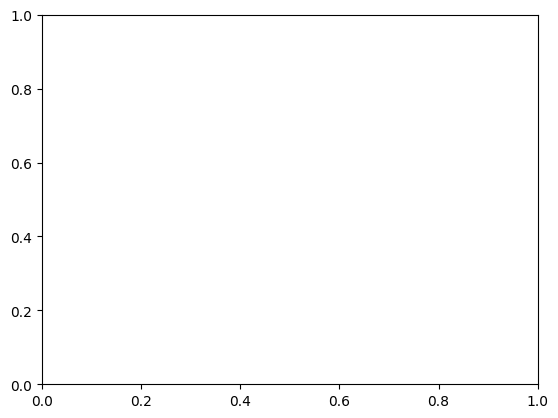

In [6]:
cap = cv2.VideoCapture(l[0])
import time
fps = 5
n = 0
threshold = 230
all_result =[]
rainmaker_result = []
%matplotlib inline

sequence = 0

while True:
    ret, frame = cap.read()
    n += 1
    if not ret:
        break
    if n % fps == 0:
        before = time.time()
        #print(n)
        image_result = []
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized_gray_frame = cv2.resize(gray, dsize=resized)

        if np.count_nonzero(resized_gray_frame > 250) > 100000:
            #plt.imshow(resized_gray_frame)
            #plt.show()
            #print("whiteout", np.count_nonzero(resized_gray_frame > 250))
            continue

        if np.count_nonzero(resized_gray_frame < 3) > 100000:
        #    plt.imshow(resized_gray_frame)
        #    plt.show()
            #print("blackout", np.count_nonzero(resized_gray_frame < 3))
            continue
        
        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ret, img_thresh = cv2.threshold(resized_gray_frame, threshold, 255, cv2.THRESH_BINARY)
        cv2.imshow('Video', resized_gray_frame)
        cv2.waitKey(1)
        #print("white",np.count_nonzero(resized_gray_frame > 250))

        #for img in image_list:
        #    image_sum = img_thresh + img.T
            #ret,th1 = cv2.threshold(image_sum,240,500,cv2.THRESH_BINARY)
        #    image_result.append(np.count_nonzero(image_sum >= 255))
        image_sum = image_list_np + img_thresh
        #print(image_sum.shape)
        #all_result.append(np.count_nonzero(image_sum >= 255))
        plt.cla()
        #plt.imshow(cropped, cmap="gray")
        #plt.pause(0.0001)
        #print(image_sum)
        #plt.imshow(gray, cmap="gray")
    #cv2.imshow('window', np.average(d_numpy, axis = 0))
    #cv2.waitKey(0)
    #plt.show()
    #plt.imshow(np.array(img_thresh), cmap="gray")
    #plt.show()
        #count = np.count_nonzero(image_sum[41] < 1)
        #rainmaker_result.append(count)
        #plt.plot(rainmaker_result)

        #print(vfunc(image_sum).shape)
        #print(image_sum.shape)
        #print(np.count_nonzero(image_sum < 1, axis=-1).shape)
        #after = time.time()

        #print(after-before)

        for i in range(len(image_sum)):
            count = np.count_nonzero(image_sum[i] < 1)
            if count < 100:
                sequences[i] += 1
                #print("count", count, name_list[i])
            else:
                sequences[i] = 0
            
            if sequences[i] > 5:
                print("count", i, name_list[i])
                plt.imshow(img_thresh, cmap="gray")
                plt.show()
                plt.imshow(image_sum[i], cmap="gray")
                plt.show()
                sequences[i] = 0
        """
        for i in range(len(image_sum)):
            count = np.count_nonzero(image_sum[i] < 1)
            if count < 1000:
                sequences[i] += 1
                print("under 1000", i, sequences[i])
            
            else:
                sequences[i] = 0
            
            if sequences[i] >5:
                plt.imshow(image_list_np[i], cmap="gray")
                plt.show()

                plt.imshow(image_sum[i], cmap="gray")
                plt.show()
                plt.imshow(img_thresh, cmap="gray")
                #plt.imshow(gray, cmap="gray")
                plt.show()
                sequences[i] = 0
                #print(count)
                #plt.pause(0.0001)
        """